# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
# Data Processing & Analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Clustering
import joblib
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

# Handling warnings
import warnings
warnings.filterwarnings("ignore")

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 10 baris pertama dengan function `head()`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info()`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe()`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [2]:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 10 baris pertama dengan function head.
df.head(10)

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37.0,Doctor,139.0,1.0,13316.71,2024-11-04 08:10:09
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67.0,Retired,291.0,1.0,2796.24,2024-11-04 08:10:55
8,TX000009,AC00135,106.23,2023-03-21 16:59:46,Credit,Detroit,D000690,24.148.92.177,M035,Branch,51.0,Engineer,86.0,1.0,9095.14,2024-11-04 08:11:14
9,TX000010,AC00385,815.96,2023-03-31 16:06:57,Debit,Nashville,D000199,32.169.88.41,M007,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 08:06:32


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

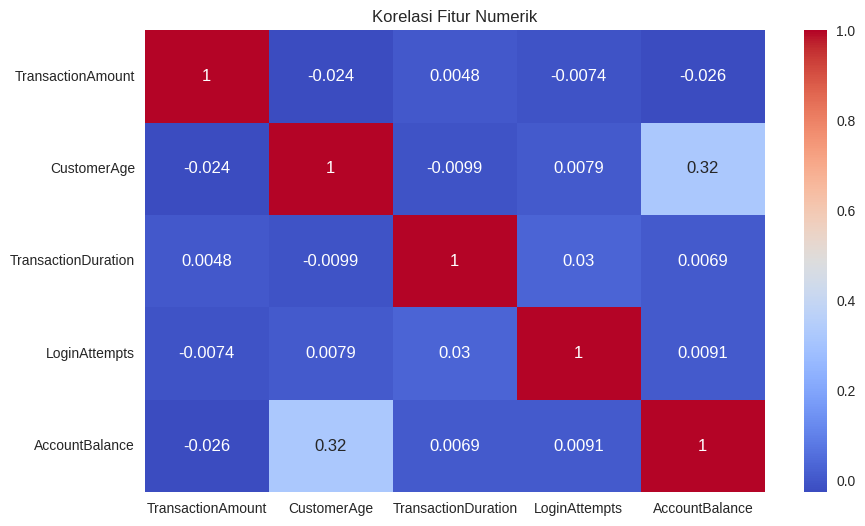

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Fitur Numerik")
plt.show()

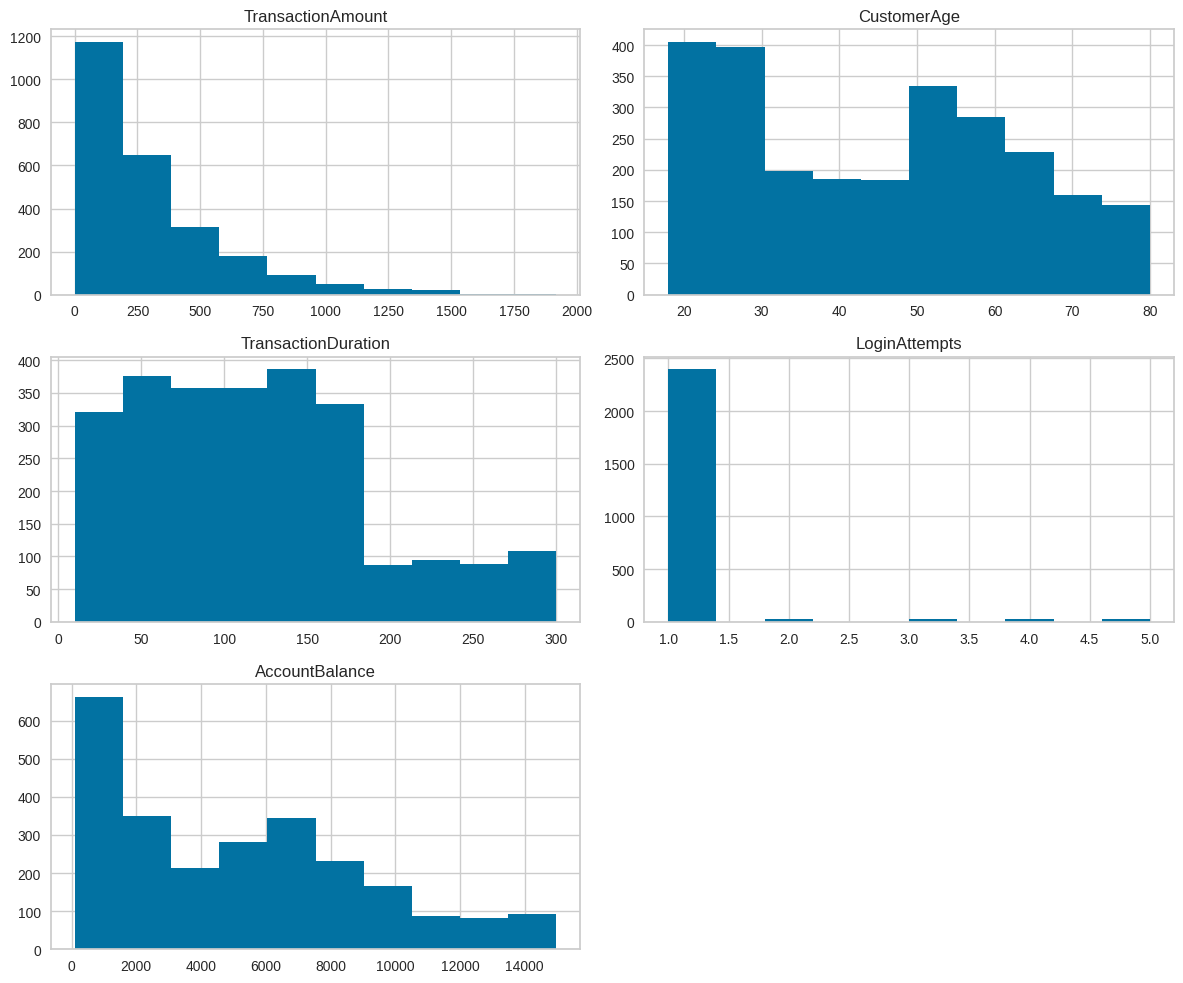

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

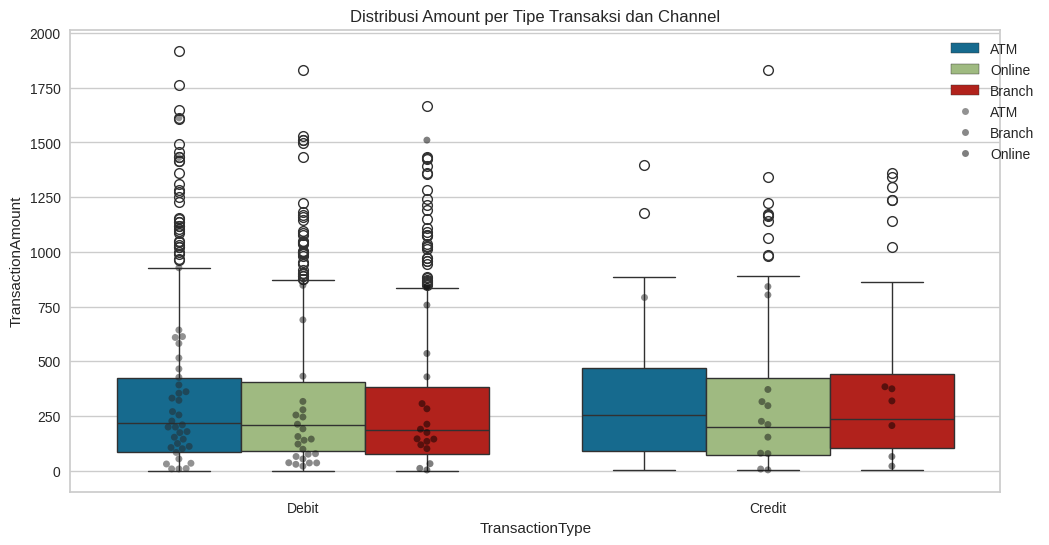

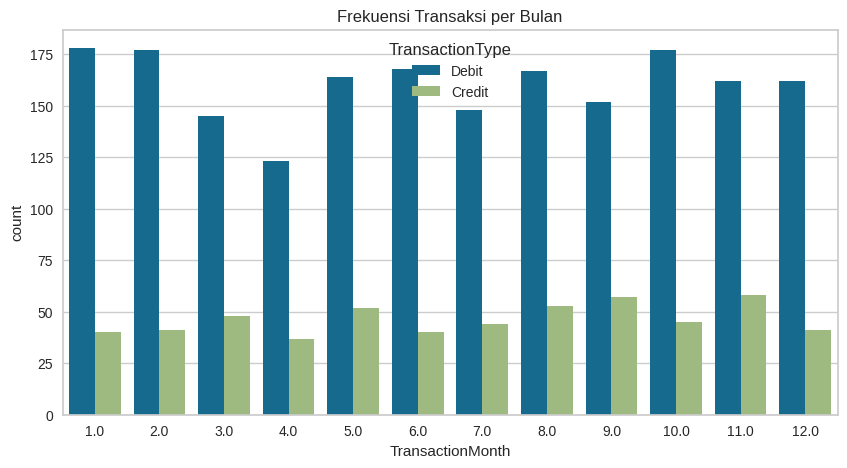

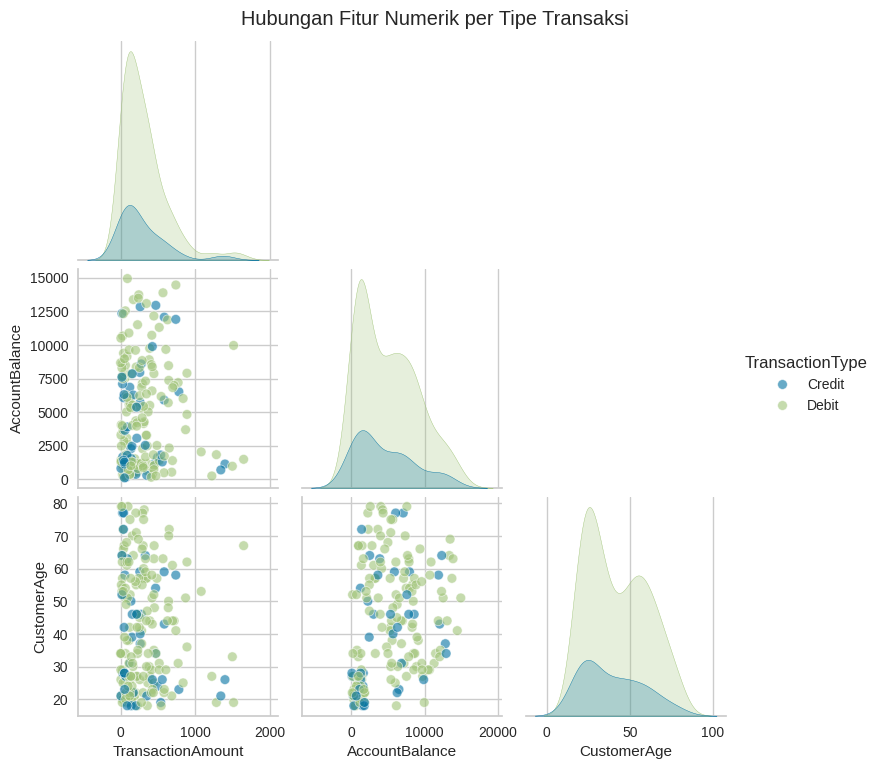

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# Analisis Distribusi dengan Boxplot + Swarmplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='TransactionType', y='TransactionAmount', hue='Channel')
sns.swarmplot(data=df.sample(100), x='TransactionType', y='TransactionAmount', hue='Channel', dodge=True, color='black', alpha=0.5)  # Sample untuk hindari overplotting
plt.title("Distribusi Amount per Tipe Transaksi dan Channel")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

# Analisis Temporal (TransactionDate)
# Ekstrak bulan/tahun dari TransactionDate
df['TransactionMonth'] = pd.to_datetime(df['TransactionDate']).dt.month
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='TransactionMonth', hue='TransactionType')
plt.title("Frekuensi Transaksi per Bulan")
plt.show()

# Multivariate Analysis dengan Pairplot
sns.pairplot(
    data=df.sample(200),  # Ambil sample untuk percepat proses
    vars=['TransactionAmount', 'AccountBalance', 'CustomerAge'],
    hue='TransactionType',
    plot_kws={'alpha': 0.6},
    corner=True
)
plt.suptitle("Hubungan Fitur Numerik per Tipe Transaksi", y=1.02)
plt.show()

# Analisis Outlier dengan Boxplot Interaktif
fig = px.box(
    df,
    y='TransactionAmount',
    x='CustomerOccupation',
    color='Channel',
    points="all",  # Tampilkan semua titik outlier
    title="Outlier Amount per Occupation & Channel"
)
fig.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())

Jumlah Missing Values per Kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
TransactionMonth           28
dtype: int64


In [10]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah Data Duplikat:", df.duplicated().sum())


Jumlah Data Duplikat: 21


In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pilih kolom numerik (exclude kolom ID/timestamp)
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration',
                'LoginAttempts', 'AccountBalance']

# Gunakan StandardScaler (atau MinMaxScaler)
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Cek hasil scaling
print("\nData setelah scaling (5 sampel):")
print(df[numeric_cols].head())


Data setelah scaling (5 sampel):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.970546     1.419862            -0.548393      -0.204629   
1           0.268963     1.307715             0.307960      -0.204629   
2          -0.586526    -1.439874            -0.905207      -0.204629   
3          -0.387294    -1.047361            -1.347656      -0.204629   
4          -0.972736          NaN             1.121495      -0.204629   

   AccountBalance  
0       -0.000315  
1        2.218381  
2       -1.024091  
3        0.886694  
4        0.594263  


In [12]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
# Pilih kolom kategorikal
cat_cols = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

# Gunakan LabelEncoder (atau pd.get_dummies untuk one-hot encoding)
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Cek hasil encoding
print("\nData setelah encoding (5 sampel):")
print(df[cat_cols].head())


Data setelah encoding (5 sampel):
   TransactionType  Location  Channel  CustomerOccupation
0                1        36        0                   0
1                1        15        0                   0
2                1        23        2                   3
3                1        33        2                   3
4                0         1        2                   3


In [13]:
# Melakukan drop pada kolom yang memiliki keterangan id
# Drop kolom ID (TransactionID, AccountID, DeviceID, IP Address, MerchantID)
id_cols = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
df.drop(columns=id_cols, inplace=True, errors='ignore')

# Verifikasi kolom tersisa
print("\nKolom setelah drop ID:", df.columns.tolist())


Kolom setelah drop ID: ['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate', 'TransactionMonth']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [14]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Isi missing value di 'CustomerAge' dengan median
df['CustomerAge'].fillna(df['CustomerAge'].median(), inplace=True)

# Isi 'CustomerOccupation' dengan modus
df['CustomerOccupation'].fillna(df['CustomerOccupation'].mode()[0], inplace=True)

# Cek kolom dengan NaN
print("Missing values sebelum cleaning:")
print(df.isnull().sum())
df = df.dropna()

# Verifikasi
print("\nMissing values setelah cleaning:")
print(df.isnull().sum().sum())

Missing values sebelum cleaning:
TransactionAmount          26
TransactionDate            28
TransactionType             0
Location                    0
Channel                     0
CustomerAge                 0
CustomerOccupation          0
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
TransactionMonth           28
dtype: int64

Missing values setelah cleaning:
0


In [15]:
# Menghapus data duplikat menggunakan drop_duplicates().
df.drop_duplicates(inplace=True)

# Hapus duplikat
df = df.drop_duplicates()

# Hapus baris dengan missing values
df_clean = df.copy()
print(f"Jumlah data setelah dibersihkan: {df_clean.shape[0]} baris")
print("\nMissing values setelah handling:", df.isnull().sum().sum())
print("Jumlah data setelah hapus duplikat:", len(df))

Jumlah data setelah dibersihkan: 2366 baris

Missing values setelah handling: 0
Jumlah data setelah hapus duplikat: 2366


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [16]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [17]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [18]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionMonth
count,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000,2366.000000
mean,-0.005205,0.788673,21.383770,1.013102,0.000754,1.528318,0.002946,-0.002672,0.001658,6.557058
std,1.000420,0.437336,12.441279,0.828814,0.996425,1.152918,1.004303,0.987029,1.001154,3.482229
min,-1.017881,0.000000,0.000000,0.000000,-1.495947,0.000000,-1.561745,-0.204629,-1.286100,1.000000
25%,-0.740921,1.000000,11.000000,0.000000,-0.991288,0.000000,-0.805299,-0.204629,-0.925975,3.000000
50%,-0.299264,1.000000,21.000000,1.000000,0.018031,2.000000,-0.105944,-0.204629,-0.101679,7.000000
75%,0.387344,1.000000,32.000000,2.000000,0.803056,3.000000,0.607683,-0.204629,0.663005,10.000000
max,5.549651,2.000000,43.000000,3.000000,1.980594,4.000000,2.577295,6.525404,2.531190,12.000000


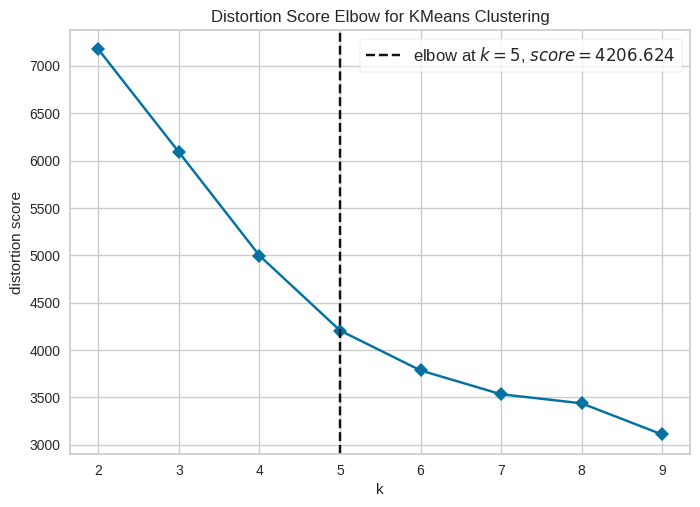

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Pilih fitur numerik dan kategorikal relevan untuk clustering
selected_cols = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'CustomerAge']
df_model = df_clean[selected_cols].copy()

# Normalisasi
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_model)

# Visualisasi Elbow Method
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)
visualizer.fit(scaled_data)
visualizer.show()

In [20]:
# Menggunakan algoritma K-Means Clustering
# Gunakan fitur terpilih dengan korelasi tinggi

# Gunakan jumlah cluster optimal dari Elbow
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Tambahkan label cluster ke dataframe asli
df_clean['Cluster'] = clusters
df_clean['Cluster'] = df_clean['Cluster'].astype(str)

Jalankan cell code ini untuk menyimpan model kamu.

In [21]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")
print("Model berhasil disimpan!")

Model berhasil disimpan!


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [22]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score untuk {optimal_k} clusters: {silhouette_avg:.4f}")

Silhouette Score untuk 4 clusters: 0.2531


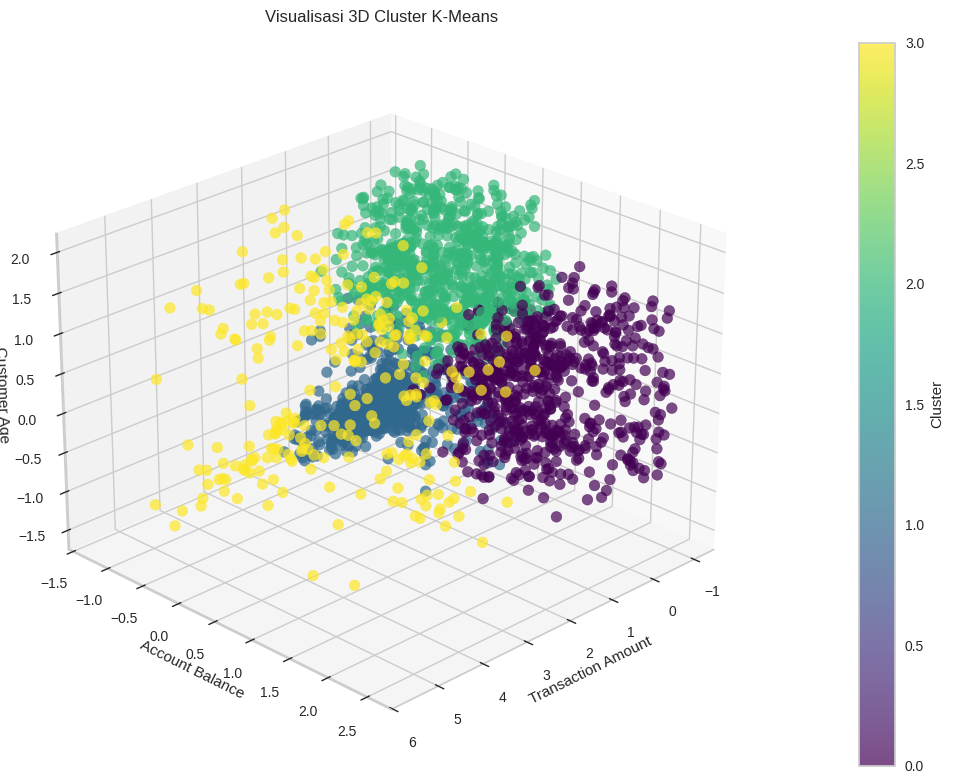

In [23]:
# Membuat visualisasi hasil clustering

# Pilih 3 fitur numerik utama
features_3d = ['TransactionAmount', 'AccountBalance', 'CustomerAge']
X_3d = df_clean[features_3d]

# Buat figure 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points dengan warna sesuai cluster
scatter = ax.scatter(
    X_3d.iloc[:, 0],
    X_3d.iloc[:, 1],
    X_3d.iloc[:, 2],
    c=df_clean['Cluster'].astype(int),
    cmap='viridis',
    s=60,
    alpha=0.7
)

# Label dan title
ax.set_title('Visualisasi 3D Cluster K-Means', pad=15)
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Account Balance')
ax.set_zlabel('Customer Age')

cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label('Cluster')

ax.view_init(elev=25, azim=45)
plt.tight_layout()
plt.show()


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

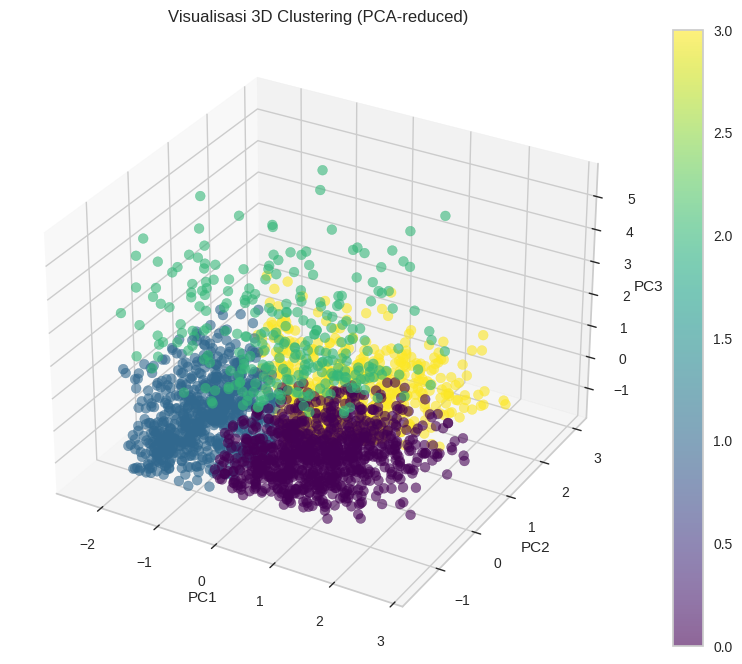

Silhouette Score K-Means + PCA: 0.3079


In [24]:
# Membangun model menggunakan PCA.
# Reduksi ke 3 komponen utama
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled_data)

# KMeans untuk data PCA
pca_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
pca_clusters = pca_kmeans.fit_predict(X_pca)

# Buat DataFrame hasil PCA
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = pca_clusters

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    pca_df['PC3'],
    c=pca_df['Cluster'],
    cmap='viridis',
    s=50,
    alpha=0.6
)

ax.set_title('Visualisasi 3D Clustering (PCA-reduced)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.colorbar(scatter)
plt.show()

# Skor silhouette untuk PCA
from sklearn.metrics import silhouette_score
pca_score = silhouette_score(X_pca, pca_clusters)
print(f"Silhouette Score K-Means + PCA: {pca_score:.4f}")

In [25]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca_kmeans, "PCA_model_clustering.h5")
print("Model PCA clustering berhasil disimpan!")

Model PCA clustering berhasil disimpan!


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [26]:
# Menampilkan analisis deskriptif minimal mean untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Statistik numerik
numeric_summary = df_clean.groupby('Cluster').agg({
    'TransactionAmount': ['mean', 'median'],
    'AccountBalance': ['mean', 'median'],
    'CustomerAge': ['mean', 'median'],
    'TransactionDuration': ['mean', 'median']
})

# Statistik kategorikal
categorical_summary = df_clean.groupby('Cluster').agg({
    'TransactionType': lambda x: x.mode()[0],
    'Channel': lambda x: x.mode()[0],
    'CustomerOccupation': lambda x: x.mode()[0]
})

print("=== Statistik Numerik per Cluster ===")
print(numeric_summary)
print("\n=== Statistik Kategorikal per Cluster ===")
print(categorical_summary)

# Interpretasi per Cluster
for cluster in sorted(df_clean['Cluster'].unique()):
    print(f"\n=== Cluster {cluster} ===")
    print("- Rata-rata Amount:", round(numeric_summary.loc[cluster, ('TransactionAmount', 'mean')], 2))
    print("- Rata-rata Balance:", round(numeric_summary.loc[cluster, ('AccountBalance', 'mean')], 2))
    print("- Rata-rata Usia:", round(numeric_summary.loc[cluster, ('CustomerAge', 'mean')], 1), "tahun")
    print("- Tipe Transaksi Dominan:", categorical_summary.loc[cluster, 'TransactionType'])
    print("- Channel Dominan:", categorical_summary.loc[cluster, 'Channel'])

=== Statistik Numerik per Cluster ===
        TransactionAmount           AccountBalance           CustomerAge  \
                     mean    median           mean    median        mean   
Cluster                                                                    
0               -0.238825 -0.406426       1.240395  1.131654    0.002430   
1               -0.226749 -0.382228      -0.892940 -1.011435   -1.041785   
2               -0.347269 -0.460795      -0.137652 -0.110335    0.965184   
3                2.181923  1.920010      -0.129577 -0.269275    0.025825   

                  TransactionDuration            
           median                mean    median  
Cluster                                          
0       -0.038043            0.138096  0.108144  
1       -1.103434           -0.002998 -0.148762  
2        0.915203           -0.099649 -0.205852  
3        0.186250           -0.006257 -0.077399  

=== Statistik Kategorikal per Cluster ===
         TransactionType  Channel  C

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya

1. **Cluster 0: (Nasabah dengan Balance Positif dan Usia Muda)**
 - **Rata-rata (mean) TransactionAmount:** -0.24 (sebelum inverse)
 - **Rata-rata (mean) AccountBalance:** 1.24 (sebelum inverse)
 - **Rata-rata (mean) CustomerAge:** 0.0 (sebelum inverse)
 - **Analisis:** Cluster ini mencakup nasabah dengan saldo akun yang relatif tinggi dan transaksi yang lebih sering dilakukan dengan tipe transaksi tertentu (Transaksi Tipe 1). Usia rata-rata yang sangat rendah atau distandarisasi (0) bisa menunjukkan bahwa nasabah pada cluster ini adalah nasabah muda yang memiliki keseimbangan akun positif dan mungkin merupakan pelanggan baru atau nasabah yang lebih aktif dalam menggunakan layanan. Rekomendasi: produk tabungan atau investasi dengan bunga tinggi untuk nasabah muda yang aktif.

2. **Cluster 1: (Nasabah dengan Pendapatan Negatif dan Transaksi Frekuensi Rendah)**
 - **Rata-rata (mean) TransactionAmount:** -0.23 (sebelum inverse)
 - **Rata-rata (mean) AccountBalance:** -0.89 (sebelum inverse)
 - **Rata-rata (mean) CustomerAge:** -1.0 (sebelum inverse)
 - **Analisis:** Cluster ini berisi nasabah dengan saldo akun negatif dan transaksi yang sering terjadi dalam tipe transaksi 1. Mungkin ini menunjukkan nasabah yang memiliki masalah dalam pengelolaan keuangan atau nasabah yang sering mengalami kekurangan dana. Usia rata-rata yang lebih rendah (secara distandarisasi) bisa menunjukkan bahwa cluster ini mencakup nasabah dengan perilaku yang lebih rentan terhadap masalah finansial. Rekomendasi: edukasi finansial dan produk pengelolaan keuangan seperti pinjaman bunga rendah atau tabungan sederhana.

3. **Cluster 2: (Nasabah dengan Balance Negatif dan Frekuensi Transaksi Lebih Rendah)**
 - **Rata-rata (mean) TransactionAmount:** -0.35 (sebelum inverse)
 - **Rata-rata (mean) AccountBalance:** -0.14 (sebelum inverse)
 - **Rata-rata (mean) CustomerAge:** 1.0 (sebelum inverse)
 - **Analisis:** Cluster 2 berisi nasabah dengan saldo akun negatif dan transaksi yang lebih sedikit. Karakteristik ini bisa mencerminkan nasabah dengan perilaku penggunaan keuangan yang tidak seaktif cluster lainnya. Rekomendasi: penawaran produk yang mendorong keterlibatan seperti program loyalitas, pembiayaan ringan, atau tabungan bertingkat.

4. **Cluster 3: (Nasabah dengan Pendapatan Tinggi dan Balance Negatif)**
 - **Rata-rata (mean) TransactionAmount:** 2.18 (sebelum inverse)
 - **Rata-rata (mean) AccountBalance:** -0.13 (sebelum inverse)
 - **Rata-rata (mean) CustomerAge:** 0.0 (sebelum inverse)
 - **Analisis:** Cluster ini mencakup nasabah dengan pengeluaran atau transaksi yang relatif tinggi, tetapi memiliki saldo akun negatif. Ini mungkin menunjukkan nasabah dengan pengeluaran besar, atau mereka yang cenderung membelanjakan seluruh pendapatannya. Rekomendasi: produk premium seperti kartu kredit eksklusif, serta edukasi manajemen keuangan agar pengeluaran lebih terkendali.


# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [27]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_clean = df_clean.rename(columns={'Cluster': 'Target'})

In [28]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_clean.to_csv('data_clustering.csv', index=False)
print("Data clustering (scaled) berhasil disimpan!")

Data clustering (scaled) berhasil disimpan!


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [29]:
# inverse dataset ke rentang normal

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [30]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [31]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)